# 1 데이터셋 출처
- pima Indians Diabetes Database |kaggle

## 1.1 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 2 필요한 라이브러리 로드

In [1]:
# 데이터분석을 위한 Pandas 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
# 구버전 주피터 노트북은 디폴트 설정떄문에 해야함

# 3 데이터셋 로드

In [2]:
!move "C:\Users\BIT-R45\Downloads\새 폴더\diabetes.csv"

지정된 파일을 찾을 수 없습니다.


In [3]:
df=pd.read_csv('file-path/data/diabetes.csv',encoding='cp949')
df.shape

(768, 9)

In [4]:
df.head()
#전부 다 숫자로 되어있어서 따로 전처리가 필요 하지 않을듯.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# ○○수치형 변수를 범주형 변수로 만들기

In [24]:
df['Pregnancies_high']=df['Pregnancies']>6

# 4 학습,예측 데이터셋 나누기

In [38]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 
# split_count 라는 변수에 담습니다.

split_count=int(df.shape[0]*0.8)
split_count

614

In [39]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.

train = df[:split_count].copy()
test = df[split_count:].copy()
test.shape

(154, 10)

# 5 학습,예측에 사용할 컬럼

In [40]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

# 6 정답값이자 예측해야 될 값

In [41]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name='Outcome'
label_name

'Outcome'

# 7 학습,예측 데이터셋 만들기

In [42]:
# 학습 세트 만들기 ex) 시험의 기출문제

x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
0,148,72,35,0,33.6,0.627,50,False
1,85,66,29,0,26.6,0.351,31,False
2,183,64,0,0,23.3,0.672,32,True
3,89,66,23,94,28.1,0.167,21,False
4,137,40,35,168,43.1,2.288,33,False


In [43]:
# 정답 값을 만들어 줍니다. ex) 기출문제의 정답
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [44]:
# 예측에 사용할 데이터세트를 만듭니다. ex) 실전 시험문제

x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
614,138,74,26,144,36.1,0.557,50,True
615,106,72,0,0,25.8,0.207,27,False
616,117,96,0,0,28.7,0.157,30,False
617,68,62,13,15,20.1,0.257,23,False
618,112,82,24,0,28.2,1.282,50,True


In [45]:
# 예측의 정답값 ex)실전 시험 문제의 정답
# 데이터세트와 정답값은 행의 크기가 일치해야한다.
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 8 머신러닝 알고리즘 가져오기

In [46]:
# 당뇨병 인지 아닌지 분류 하는거 이기 때문에 Classifier 사용
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 9 학습(훈련)
- 시험을 볼 때 기출문제(x_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [47]:
# model.fit?
model.fit(x_train,y_train)

DecisionTreeClassifier()

# 10 예측
- 실전 시험문제(x_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [48]:
y_predict = model.predict(x_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

# 11 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.

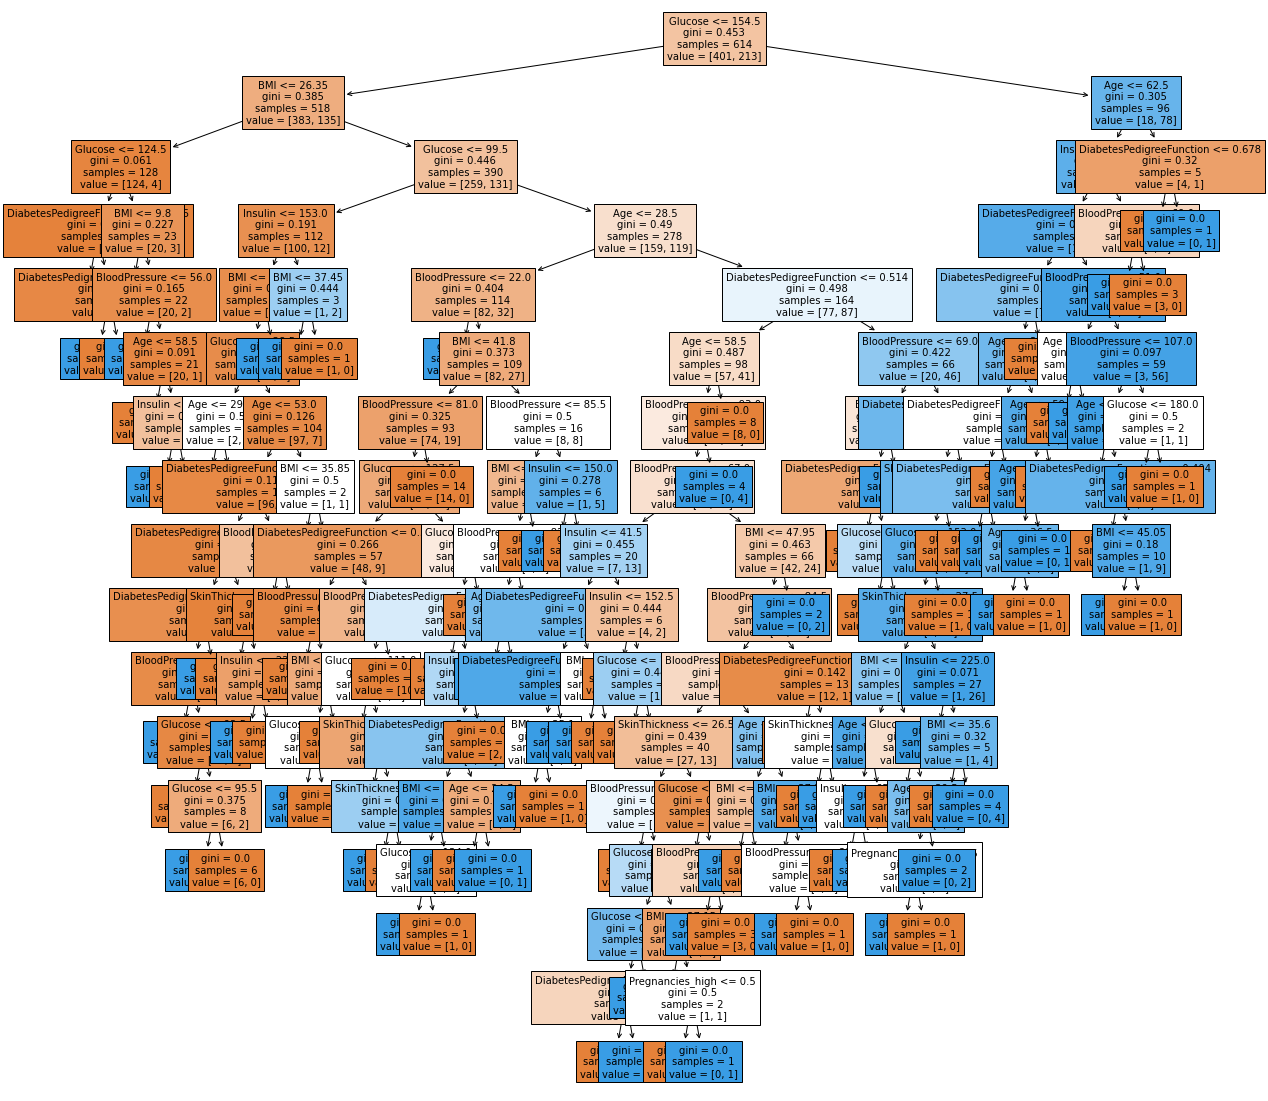

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)
# 글루코스가 가장 좋은 조건
# 지니계수가 0이되면 당뇨병이다 아니다 판단하게됨.
# 오버피팅(과적합)을 방지하기위해 트리의 깊이를 제한 하기도 함.

In [50]:
# 피처의 중요도를 추출하기
# 피처의 순서에 따라서 중요도 알려줌
model.feature_importances_

array([0.34907967, 0.14921988, 0.03862483, 0.05319703, 0.16430508,
       0.12794093, 0.11044399, 0.0071886 ])

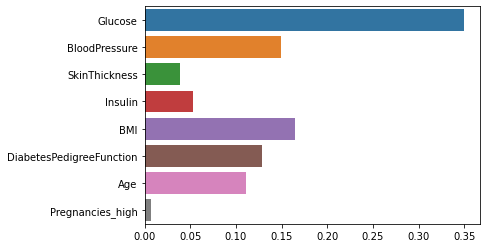

In [51]:
# 피처의 중요도 시각화하기
# 생각외로 인슐린 수치가 당뇨병에 큰 중요도가 있진 않았음.
sns.barplot(x=model.feature_importances_,y=feature_names)

# 12 정확도(Accuracy) 측정하기

In [52]:
# 실제갑 - 예측값을 빼주면 같은 값은 0으로 나오게 된다
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# abs(y_test - y_predict).sum()/len(y_test)


diff_count = abs(y_test - y_predict).sum()
diff_count

41

In [53]:
# 예측 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count)/len(y_test) * 100

73.37662337662337

In [54]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘ㅇ르 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict) * 100

73.37662337662337

In [55]:
# model의 score로 점수를 계산합니다.
model.score(x_test,y_test) * 100

73.37662337662337

In [56]:
# 피쳐 엔지니어링 이나 모델 엔지니어링 통해서 모델의 성능을 높힐 수 있다.
# 모수가 적은 데이터를 가지고 일반화 했을때 예측력이 오히려 떨어 질 수도 있다.
# 과적합(오버피팅)이 일어날 수 있다.
# 연속된 수치데이터를 범주형 데이터로 만들거나 결측치를 조정해서 과적합을 줄일 수 있다.

- 다양한 옵션을 지정하여 모델의 성능을 개선해볼 수도 있지만 feature engineering을 해보겠습니다.
- 수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어 tree가 깊어집니다.